In [257]:
import sys
import os

sys.path.append('/import/silo2/aloe8475/Documents/edamame') #point to edamame locally
sys.path.append('/import/silo2/aloe8475/Documents/CODE/Analysis/Training/Associative Learning/EquilProp') #point to edamame locally

fileName='/import/silo2/aloe8475/Documents/Data/Associative Learning/Sparse Networks/asn_nw_00350_nj_01350_seed_1581_avl_10.00_disp_01.00_lx_50.00_ly_50.00'
#point to network data path ^ 

#saveFig='/import/silo2/aloe8475/Documents/Data/Figures/Equil Prop/' 

#import edamame (neuromorphic nanowire python package by Ruomin Zhu)
from edamame import * 
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.io import loadmat, savemat
import networkx as nx
from tqdm.notebook import tqdm_notebook as tqdm
from IPython.core.debugger import set_trace

from matplotlib import animation
from matplotlib import colorbar as clbr
from PIL import Image
from matplotlib.ticker import LogFormatter 
from matplotlib import rcParams


import pickle 
import _pickle as cPickle
import gzip

In [258]:
#Functions:
def getWeightedGraph(sims,edgeList,numWires,time,edge_mode):#, this_TimeStamp = 0):
#     edgeList = network['edge_list']
    adjMat = np.zeros((numWires, numWires))
#     set_trace()
    if edge_mode=='conductance':
        adjMat[edgeList[:,0], edgeList[:,1]] = sims.junctionConductance[time,:]#network.junctionSwitch[this_TimeStamp,:] #CHANGE THIS TO CONDUCTANCE THRESHOLD?
        adjMat[edgeList[:,1], edgeList[:,0]] = sims.junctionConductance[time,:]#network.junctionSwitch[this_TimeStamp,:] #CHANGE THIS TO CONDUCTANCE THRESHOLD?
        maxWeights=np.max(sims.junctionConductance)

    elif edge_mode=='current':
        adjMat[edgeList[:,0], edgeList[:,1]] = sims.junctionVoltage[time,:]*sims.junctionConductance[time,:]
        adjMat[edgeList[:,1], edgeList[:,0]] = sims.junctionVoltage[time,:]*sims.junctionConductance[time,:]
        maxWeights=np.max(sims.junctionVoltage*sims.junctionConductance)
    elif edge_mode=='filament':
        adjMat[edgeList[:,0], edgeList[:,1]] = sims.filamentState[time,:]
        adjMat[edgeList[:,1], edgeList[:,0]] = sims.filamentState[time,:]
        
    WeightedGraph = nx.from_numpy_array(adjMat)
    WeightedGraph=nx.DiGraph.to_undirected(WeightedGraph)
    
    return WeightedGraph

def image_draw_voltage(time,cmap,maxWeights,minWeights):
    ax.clear() 
    pos=nx.kamada_kawai_layout(g)
           
    #ALON'S CODE:    
    node_weight=sim.wireVoltage[time]

    pos=nx.kamada_kawai_layout(g)
    nodeList=g.nodes
    numWires=g.number_of_nodes()

    h=nx.draw_networkx_nodes(g,pos=pos,node_color=node_weight,cmap=cmap,node_size=50,ax=ax)

    h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color='grey')
    # nx.draw_networkx_nodes(g,pos=pos,nodelist=sources,node_color='g',node_size=50,ax=ax)
    nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[1]],node_color='r',node_size=10,ax=ax)
    nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[0]],node_color='b',node_size=10,ax=ax)
    ax.set_title(str(time))
    
import matplotlib.colors as clrs

def image_draw_current_filament(time,edge_mode,edge_weight,cmap,maxWeights,minWeights):
    ax.clear() 
    pos=nx.kamada_kawai_layout(g)
        
    #RUOMIN'S CODE:
#     draw_graph(sim,time,edge_mode=edge_mode,edge_weight=edge_weight,edge_colorbar=False,node_size=30,figsize=(10,8),edge_cmap=cmap,with_labels=False,norm=True,ax=ax,maxWeight=maxWeights,minWeight=minWeights)

    #ALON'S CODE:    
    
    edge_mode=animationType
    edgeList=sim.connectivity.edge_list
    numWires=g.number_of_nodes()
    G=getWeightedGraph(sim,edgeList,numWires,time,edge_mode)
    
    edge_weights=nx.get_edge_attributes(G,'weight')
#     G.remove_edges_from((e for e, w in edge_weights.items() if w <1e-)) 
    
    edges=G.edges()
    weights=[G[u][v]['weight'] for u,v in edges]

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=clrs.SymLogNorm(1e-8,base=10,vmin=minWeights, vmax=maxWeights))
    sm.set_array([])
    normweights=sm.norm(weights).data
    normMin=sm.norm(minWeights)
    normMax=sm.norm(maxWeights)
    
    h=nx.draw_networkx_nodes(g,pos=pos,node_color='grey',node_size=20,ax=ax)
#     h.set_zorder(1)
    h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color=normweights,width=2,edge_cmap=cmap,edge_vmin=normMin,edge_vmax=normMax,alpha=0.7)


    nx.draw_networkx_nodes(g,pos=pos,nodelist=sources,node_color='g',node_size=50,ax=ax)
    nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[1]],node_color='r',node_size=50,ax=ax)
    nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[0]],node_color='b',node_size=50,ax=ax)


In [259]:
saveFig='/import/silo2/aloe8475/Documents/Data/Figures/Equil Prop/'

In [260]:
pwd

'/import/silo2/aloe8475/Documents/CODE/Analysis/Training/Associative Learning/EquilProp/n-back'

In [262]:
nback=1

In [264]:
ManualSources=True

if ManualSources:
    if nback==1:
        file = open('/import/silo2/aloe8475/Documents/CODE/Analysis/Training/Associative Learning/EquilProp/n-back/nback1-manual-elecs-nw350-nj1350','rb')
    elif nback==2:
        file = open('/import/silo2/aloe8475/Documents/CODE/Analysis/Training/Associative Learning/EquilProp/n-back/nback-manual-elecs','rb')
else:
    file = open('/import/silo2/aloe8475/Documents/CODE/Analysis/Training/Associative Learning/EquilProp/n-back/nback','rb')
#load data
[df,sim,targets,testTime,trainInputs,testInputs] = pickle.load(file)


In [265]:
signalLen=df['Test Time End'].values[-1]-df['Train Time Start'].values[0]

In [266]:
numDT=20
triallen=len(targets)
xlims=[df['Train Time Start'].values[0],df['Test Time End'].values[-1]]


In [267]:
mask=np.in1d(np.arange(triallen),testTime)
a=targets.astype(float)
a[~mask]=np.nan
colrs=[]
for val in a:
    if val > 0:
        colrs.append('r')
    else:
        colrs.append('b')

In [268]:
df[:-1]

Class Order  Trial  Accuracy  C1NoTest  C2NoTest  CountDiff  C1+Test  \
180      2    c2      9       1.0         0         0          1        0   
181      2    c2      9       1.0         0         1          2        0   
182      2    c2      9       1.0         0         2          3        0   
183      1    c1      9       0.0         0         3          2        0   
184      2    c2      9       1.0         1         3          3        2   
185      2    c2      9       1.0         1         4          4        2   
186      1    c1      9       0.9         1         5          3        2   
187      2    c2      9       1.0         2         5          4        4   
188      2    c2      9       1.0         2         6          5        4   
189      1    c1      9       0.0         2         7          4        4   
190      1    c1      9       1.0         3         7          3        6   
191      1    c1      9       1.0         4         7          2        8   
192      2    c2      9       0.3         5         7          3       10   
193      1    c1      9       1.0         5         8          2       10   
194      2    c2      9       0.0         6         8          3       12   
195      2    c2      9       1.0         6         9          4       12   
196      1    c1      9       1.0         6        10          3       12   
197      2    c2      9       1.0         7        10          4       14   
198      2    c2      9       1.0         7        11          5       14   

     C2+Test  C1count  C2count  OrderVal  Train Time Start  Train Time End  \
180        0        0        1         0                 0              39   
181        2        0        2         1                60              99   
182        4        0        3         2               120             159   
183        6        1        3         3               180             219   
184        6        1        4         4               240             279   
185        8        1        5         5               300             339   
186       10        2        5         6               360             399   
187       10        2        6         7               420             459   
188       12        2        7         8               480             519   
189       14        3        7         9               540             579   
190       14        4        7        10               600             639   
191       14        5        7        11               660             699   
192       14        5        8        12               720             759   
193       16        6        8        13               780             819   
194       16        6        9        14               840             879   
195       18        6       10        15               900             939   
196       20        7       10        16               960             999   
197       20        7       11        17              1020            1059   
198       22        7       12        18              1080            1119   

     Test Time Start  Test Time End  
180               40             59  
181              100            119  
182              160            179  
183              220            239  
184              280            299  
185              340            359  
186              400            419  
187              460            479  
188              520            539  
189              580            599  
190              640            659  
191              700            719  
192              760            779  
193              820            839  
194              880            899  
195              940            959  
196             1000           1019  
197             1060           1079  
198             1120           1139

In [269]:
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)
x=sim.electrodeCurrent[:,:2]
plt.figure(figsize=(10,8))
plt.plot(x[:,0],color='b')

plt.plot(x[:,1],color='r')
ax=plt.gca()
# ax.set_xlim(xlims)
ax.set_xlim([-30,1230])

colrs=[]
for val in df['Class']:
    if val <= 1:
        colrs.append('C1')
    else:
        colrs.append('C2')


ax2=ax.twinx().twiny()

ax2.set_xticks(np.array(range(40,len(x)-10,60))/20)

testTimeVals=list(df['OrderVal']*3+3)


sns.scatterplot(x=testTimeVals[:-1],y='Accuracy',data=df[:-1],hue=colrs[:-1],palette=['r','b'],ax=ax2)
ax2.legend(title='Accuracy',loc='lower left')
ax2.set_xlim([-20/20,1240/20])
ax2.set_ylabel('Accuracy')

# ax2=plt.twinx()
# ax2.set_xlim(xlims)
# plt.scatter(np.arange(triallen),a,marker='_',color=colrs)


Text(0, 0.5, 'Accuracy')

In [270]:
#load network
nw=loadmat(fileName)
g=nx.from_numpy_array(nw['adj_matrix'])

In [271]:
drains=sim.electrodes[:2]
sources=sim.electrodes[2:]
onAmp=1.5
onAmpTest=0.25

###  Draw Drain Current Plot:


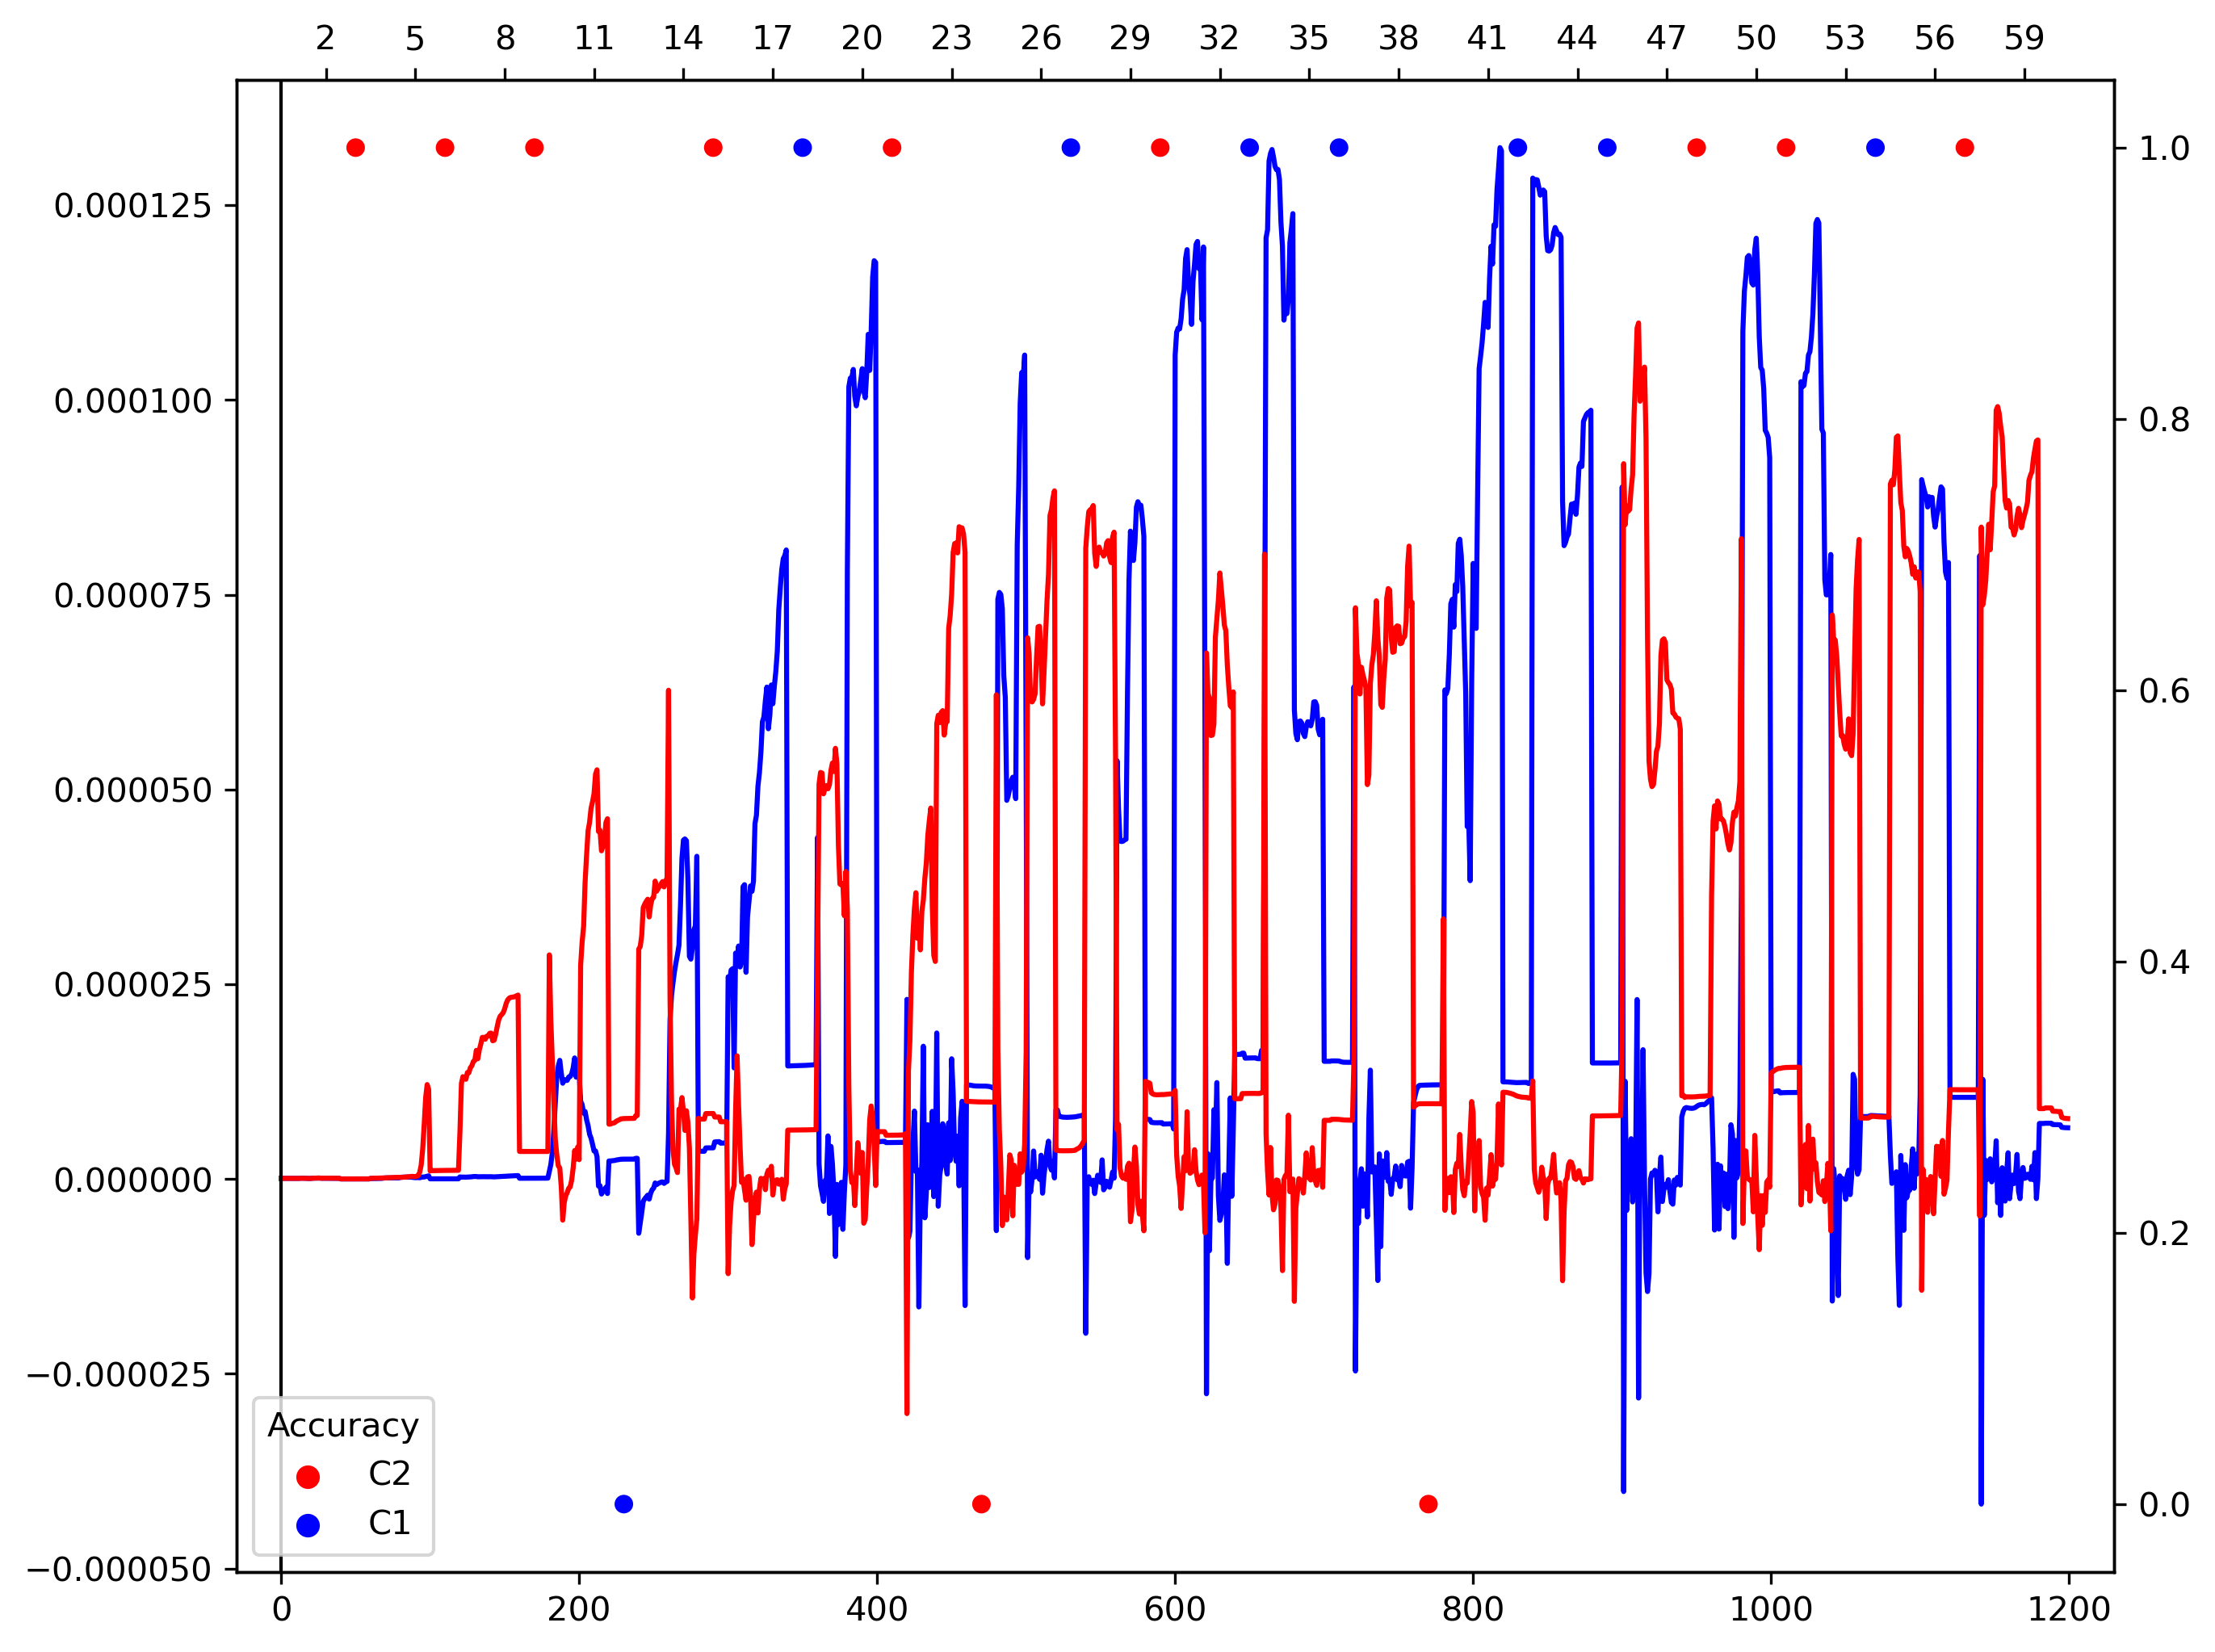

In [223]:
plt.rcParams.update(plt.rcParamsDefault)

duration = len(range(xlims[0],xlims[1],1)[::10]) # in sec
refreshPeriod = 10 # in ms

fig,ax = plt.subplots(1,1, figsize=(10, 8), dpi=300)
vl = ax.axvline(0, ls='-', color='k', lw=1, zorder=10)

x=sim.electrodeCurrent[:,:2]
ax.plot(x[:,0],color='b')

ax.plot(x[:,1],color='r')
# ax.set_xlim(xlims)
ax.set_xlim([-30,1230])

colrs=[]
for val in df['Class']:
    if val <= 1:
        colrs.append('C1')
    else:
        colrs.append('C2')


ax2=ax.twinx().twiny()

ax2.set_xticks(np.array(range(40,len(x)-10,60))/20)

testTimeVals=list(df['OrderVal']*3+3)


sns.scatterplot(x=testTimeVals[:-1],y='Accuracy',data=df[:-1],hue=colrs[:-1],palette=['r','b'],ax=ax2)
ax2.legend(title='Accuracy',loc='lower left')
ax2.set_xlim([-20/20,1240/20])
ax2.set_ylabel('Accuracy')


plt.show()


if ManualSources:
    fig.savefig(saveFig+'currents_nback_manualsources.png')
else:
    fig.savefig(saveFig+'currents_nback.png')
def animate(i,vl,period):
    t = i 
#     set_trace()
    vl.set_xdata([t,t])
    return vl,

ani = animation.FuncAnimation(fig, animate, frames=range(xlims[0],xlims[1],1)[::10], fargs=(vl,refreshPeriod), interval=refreshPeriod)
# plt.show()

In [15]:
currentPath=os.getcwd()
FFwriter = animation.FFMpegWriter()
os.chdir(saveFig)
if ManualSources:
    ani.save('nback_timestep_track_trial9_t'+str(xlims[0])+'_'+str(xlims[1])+'_manualsources.mp4', fps=10,
              progress_callback = lambda i, n: print(f'Saving frame {i} of {n}'),)
else:
    ani.save('nback_timestep_track_trial9_t'+str(xlims[0])+'_'+str(xlims[1])+'.mp4', fps=10,
              progress_callback = lambda i, n: print(f'Saving frame {i} of {n}'),)

os.chdir(currentPath)

2021-12-15 10:38:30,642:INFO:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2021-12-15 10:38:30,644:INFO:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 3000x2400 -pix_fmt rgba -r 10 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y nback_timestep_track_trial9_t0_1199_manualsources.mp4


Saving frame 0 of 120
Saving frame 1 of 120
Saving frame 2 of 120
Saving frame 3 of 120
Saving frame 4 of 120
Saving frame 5 of 120
Saving frame 6 of 120
Saving frame 7 of 120
Saving frame 8 of 120
Saving frame 9 of 120
Saving frame 10 of 120
Saving frame 11 of 120
Saving frame 12 of 120
Saving frame 13 of 120
Saving frame 14 of 120
Saving frame 15 of 120
Saving frame 16 of 120
Saving frame 17 of 120
Saving frame 18 of 120
Saving frame 19 of 120
Saving frame 20 of 120
Saving frame 21 of 120
Saving frame 22 of 120
Saving frame 23 of 120
Saving frame 24 of 120
Saving frame 25 of 120
Saving frame 26 of 120
Saving frame 27 of 120
Saving frame 28 of 120
Saving frame 29 of 120
Saving frame 30 of 120
Saving frame 31 of 120
Saving frame 32 of 120
Saving frame 33 of 120
Saving frame 34 of 120
Saving frame 35 of 120
Saving frame 36 of 120
Saving frame 37 of 120
Saving frame 38 of 120
Saving frame 39 of 120
Saving frame 40 of 120
Saving frame 41 of 120
Saving frame 42 of 120
Saving frame 43 of 12

In [233]:
x[779]

array([1.20915083e-05, 9.65333465e-06])

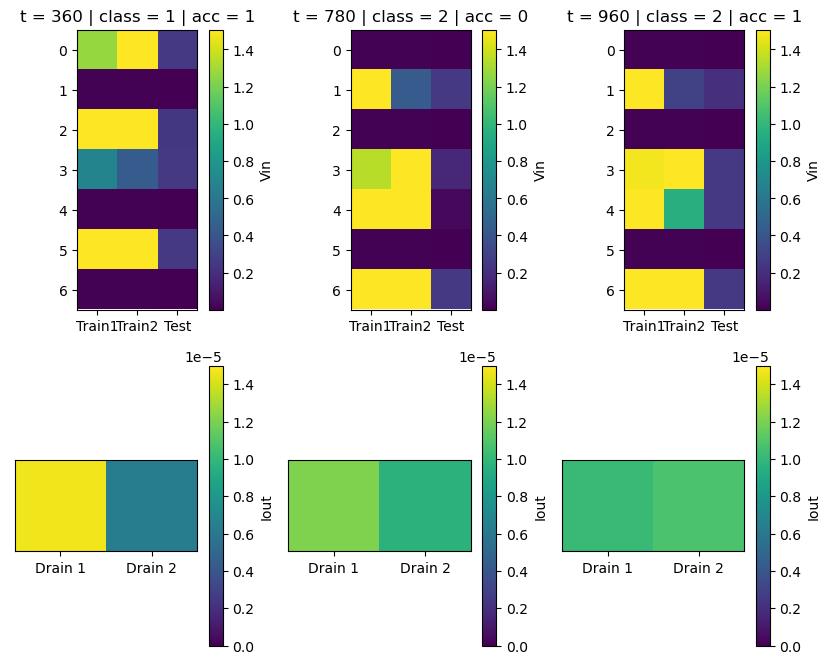

In [241]:
#INPUTS:
fig,axes=plt.subplots(2,3,figsize=(10,8))
ax=axes[0,0]
a=ax.imshow(np.hstack((trainInputs[[10,11]].T*onAmp,testInputs[5].reshape(7,1)*onAmpTest)))
plt.colorbar(a,ax=ax,label='Vin')
ax.set_title('t = 360 | class = 1 | acc = 1')
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Train1','Train2','Test'])
ax=axes[0,1]
b=ax.imshow(np.hstack((trainInputs[[24,25]].T*onAmp,testInputs[12].reshape(7,1)*onAmpTest)))
ax.set_title('t = 780 | class = 2 | acc = 0')
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Train1','Train2','Test'])
plt.colorbar(b,ax=ax,label='Vin')

ax=axes[0,2]
c=ax.imshow(np.hstack((trainInputs[[30,31]].T*onAmp,testInputs[15].reshape(7,1)*onAmpTest)))
plt.colorbar(c,ax=ax,label='Vin')
ax.set_title('t = 960 | class = 2 | acc = 1')
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Train1','Train2','Test'])

ax=axes[1,0]
a=ax.imshow(x[359,[0,1]].reshape(1,2),vmin=0,vmax=1.5e-5)
plt.colorbar(a,ax=ax,label='Iout')
ax.set_xticks([0,1])

ax.set_xticklabels(['Drain 1','Drain 2'])
ax.set_yticks([])
ax=axes[1,1]
b=ax.imshow(x[779,[0,1]].reshape(1,2),vmin=0,vmax=1.5e-5)
plt.colorbar(b,ax=ax,label='Iout')
ax.set_xticks([0,1])

ax.set_xticklabels(['Drain 1','Drain 2'])
ax.set_yticks([])
ax=axes[1,2]
c=ax.imshow(x[959,[0,1]].reshape(1,2),vmin=0,vmax=1.5e-5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Drain 1','Drain 2'])
ax.set_yticks([])

plt.colorbar(c,ax=ax,label='Iout')
plt.show()

###  Draw Network Junction Current/Conductance:


In [40]:

plt.close('all')
rcParams['animation.embed_limit'] = 2**64


edge_mode='custom'
animationType = 'filament'


if animationType =='current':
    minWeights=0
    junctionCurrents=np.array(sim.junctionVoltage*sim.junctionConductance)
    edge_weight = junctionCurrents
    maxWeights=np.max(junctionCurrents)
    cmap=plt.cm.magma_r
elif animationType== 'conductance':
    minWeights=0
    maxWeights=np.max(sim.junctionConductance)
    cmap=plt.cm.magma_r
    edge_weight=sim.junctionConductance
elif animationType== 'filament':
    minWeights=0
    maxWeights=np.max(sim.filamentState)
    cmap=plt.cm.coolwarm
    edge_weight=sim.filamentState

f,[ax,cax] = plt.subplots(1,2, gridspec_kw={"width_ratios":[50,1]},frameon=False, figsize=(10, 8), dpi=300)
canvas_width, canvas_height = f.canvas.get_width_height()
ax.axis('off')
cax.axis('off')

# clrplt=np.linspace(minWeights,maxWeights,1000).reshape(1000,1)
# img=cax.imshow(clrplt,cmap=cmap,norm=clrs.LogNorm())
# cax.set_visible(False)
# formatter = LogFormatter(10, labelOnlyBase=True) 
# norm=clrs.SymLogNorm(1,base=10,vmin=minWeights,vmax=maxWeights)
# cb1=clbr.ColorbarBase(cax,cmap=cmap,norm=norm)


pos=nx.kamada_kawai_layout(g)
edgeList=sim.connectivity.edge_list
numWires=g.number_of_nodes()
G=getWeightedGraph(sim,edgeList,numWires,262,animationType)

# edge_weights=nx.get_edge_attributes(G,'weight')
# G.remove_edges_from((e for e, w in edge_weights.items() if w <1e-10)) 

edges=G.edges()
weights=[G[u][v]['weight'] for u,v in edges]

# normweights = (np.array(weights)-minWeights) / (maxWeights - minWeights)
# weights = [cmap(color_normal(e)) for e in weights]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=clrs.SymLogNorm(1e-8,base=10,vmin=minWeights, vmax=maxWeights))
sm.set_array([])

normweights=sm.norm(weights).data
normMin=sm.norm(minWeights)
normMax=sm.norm(maxWeights)

h=nx.draw_networkx_nodes(g,pos=pos,node_color='grey',node_size=20,ax=ax)

h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color=normweights,width=2,edge_cmap=cmap,edge_vmin=normMin,edge_vmax=normMax)
nx.draw_networkx_nodes(g,pos=pos,nodelist=sources,node_color='g',node_size=50,ax=ax)
nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[1]],node_color='r',node_size=50,ax=ax)
nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[0]],node_color='b',node_size=50,ax=ax)


cbar = plt.colorbar(sm, ax=ax,
                    fraction = 0.05, label=animationType)


anim1 = animation.FuncAnimation(f, image_draw_current_filament, 
                               frames=range(xlims[0],xlims[1],1)[::10], 
                               interval=20, 
                               repeat=False,fargs=(edge_mode,edge_weight,cmap,maxWeights,minWeights))


In [37]:
# #Draw Example Time:
# # plt.figure()
# time = 780
# image_draw_current_filament(time,edge_mode,edge_weight,cmap,maxWeights,minWeights)
# plt.show()

In [23]:
#CURRENT/CONDUCTANCE/FILAMENT FRAMES
times=[360,780]
fig,axes=plt.subplots(1,2,figsize=(10,4),dpi=300)

animationType='current'

if animationType =='current':
    minWeights=0
    junctionCurrents=np.array(sim.junctionVoltage*sim.junctionConductance)
    edge_weights = junctionCurrents
    maxWeights=np.max(junctionCurrents)
    cmap=plt.cm.magma_r
elif animationType== 'conductance':
    minWeights=0
    maxWeights=np.max(sim.junctionConductance)
    cmap=plt.cm.coolwarm
    edge_weights=sim.junctionConductance

for i in range(len(axes)):
    ax=axes[i]
    time=times[i]
   
    edge_weight=edge_weights[time]
    
    pos=nx.kamada_kawai_layout(g)
    nodeList=g.nodes
    numWires=g.number_of_nodes()
    edgeList=sim.connectivity.edge_list
    G=getWeightedGraph(sim,edgeList,numWires,time,animationType)

    edges=G.edges()
    weights=[G[u][v]['weight'] for u,v in edges]

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=clrs.SymLogNorm(1e-8,base=10,vmin=minWeights, vmax=maxWeights))
    sm.set_array([])

    normweights=sm.norm(weights).data
    normMin=sm.norm(minWeights)
    normMax=sm.norm(maxWeights)

    h=nx.draw_networkx_nodes(g,pos=pos,node_color='grey',node_size=10,ax=ax,alpha=0.7)

    h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color=normweights,width=1.5,edge_cmap=cmap,edge_vmin=normMin,edge_vmax=normMax)
    nx.draw_networkx_nodes(g,pos=pos,nodelist=sources,node_color='g',node_size=50,ax=ax)
    nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[1]],node_color='r',node_size=50,ax=ax)
    nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[0]],node_color='b',node_size=50,ax=ax)
    ax.set_title(str(time))
    
    cbar = plt.colorbar(sm, ax=ax,
                    fraction = 0.05, label=animationType)

if ManualSources:
    fig.savefig(saveFig+'junction'+str(animationType)+'_trial9_t'+str(times[0])+'_vs_'+str(times[1])+'_manualsources.png')
else:
    fig.savefig(saveFig+'junction'+str(animationType)+'_trial9_t'+str(times[0])+'_vs_'+str(times[1])+'.png')


In [24]:
plt.close('all')

In [41]:
#MP4
currentPath=os.getcwd()
FFwriter = animation.FFMpegWriter()
os.chdir(saveFig)
if ManualSources:
    anim1.save('nback_explore_'+animationType+'_trial9_t'+str(xlims[0])+'_'+str(xlims[1])+'_magmacmap_manualsources.mp4', fps=10,
              progress_callback = lambda i, n: print(f'Saving frame {i} of {n}'),)
else:
    anim1.save('nback_explore_'+animationType+'_trial9_t'+str(xlims[0])+'_'+str(xlims[1])+'_magmacmap.mp4', fps=10,
              progress_callback = lambda i, n: print(f'Saving frame {i} of {n}'),)
os.chdir(currentPath)


2021-12-21 14:00:28,674:INFO:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2021-12-21 14:00:28,676:INFO:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 3000x2400 -pix_fmt rgba -r 10 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y nback_explore_filament_trial9_t0_1199_magmacmap_manualsources.mp4


Saving frame 0 of 120
Saving frame 1 of 120
Saving frame 2 of 120
Saving frame 3 of 120
Saving frame 4 of 120
Saving frame 5 of 120
Saving frame 6 of 120
Saving frame 7 of 120
Saving frame 8 of 120
Saving frame 9 of 120
Saving frame 10 of 120
Saving frame 11 of 120
Saving frame 12 of 120
Saving frame 13 of 120
Saving frame 14 of 120
Saving frame 15 of 120
Saving frame 16 of 120
Saving frame 17 of 120
Saving frame 18 of 120
Saving frame 19 of 120
Saving frame 20 of 120
Saving frame 21 of 120
Saving frame 22 of 120
Saving frame 23 of 120
Saving frame 24 of 120
Saving frame 25 of 120
Saving frame 26 of 120
Saving frame 27 of 120
Saving frame 28 of 120
Saving frame 29 of 120
Saving frame 30 of 120
Saving frame 31 of 120
Saving frame 32 of 120
Saving frame 33 of 120
Saving frame 34 of 120
Saving frame 35 of 120
Saving frame 36 of 120
Saving frame 37 of 120
Saving frame 38 of 120
Saving frame 39 of 120
Saving frame 40 of 120
Saving frame 41 of 120
Saving frame 42 of 120
Saving frame 43 of 12

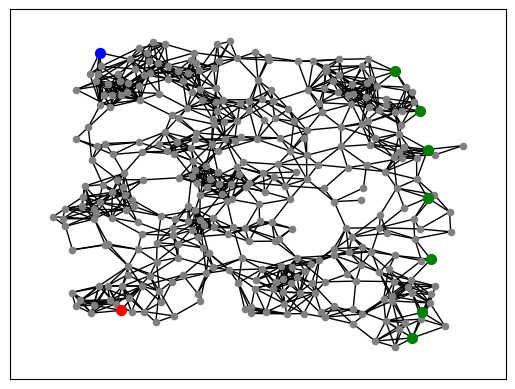

In [26]:
fig=plt.figure()
pos=nx.kamada_kawai_layout(g)
nx.draw_networkx(g,pos=pos,node_color='grey',with_labels=False,node_size=20)

nx.draw_networkx_nodes(g,pos=pos,nodelist=sources,node_color='g',node_size=50)
nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[1]],node_color='r',node_size=50)
nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[0]],node_color='b',node_size=50)

plt.show()
if ManualSources:
    fig.savefig(saveFig+'network_manualsources.png')
else:
    fig.savefig(saveFig+'network.png')

###  Draw Network Wire Voltages:


In [27]:
#VOLTAGE ANIMATION
times=[360,780]
fig,axes=plt.subplots(1,2,figsize=(10,4),dpi=300)

minWeights=0
maxWeights=np.max(sim.wireVoltage)
cmap=plt.cm.viridis

for i in range(len(axes)):
    ax=axes[i]
    time=times[i]
   
    node_weight=sim.wireVoltage[time]

    pos=nx.kamada_kawai_layout(g)
    nodeList=g.nodes
    numWires=g.number_of_nodes()

    h=nx.draw_networkx_nodes(g,pos=pos,node_color=node_weight,cmap=cmap,node_size=50,ax=ax,vmin=minWeights,vmax=maxWeights)

    h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color='grey')
    # nx.draw_networkx_nodes(g,pos=pos,nodelist=sources,node_color='g',node_size=50,ax=ax)
    nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[1]],node_color='r',node_size=10,ax=ax)
    nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[0]],node_color='b',node_size=10,ax=ax)
    ax.set_title(str(time))
    plt.colorbar(h,ax=ax,label='V')

if ManualSources:
    fig.savefig(saveFig+'wireVoltage_trial9_t'+str(times[0])+'_vs_'+str(times[1])+'_manualsources.png')
else:
    fig.savefig(saveFig+'wireVoltage_trial9_t'+str(times[0])+'_vs_'+str(times[1])+'.png')


In [28]:
f,[ax,cax] = plt.subplots(1,2, gridspec_kw={"width_ratios":[50,1]},frameon=False, figsize=(10, 8), dpi=300)
canvas_width, canvas_height = f.canvas.get_width_height()
ax.axis('off')
cax.axis('off')


minWeights=0
maxWeights=np.max(sim.wireVoltage)
cmap=plt.cm.viridis


node_weight=sim.wireVoltage[0]

pos=nx.kamada_kawai_layout(g)
nodeList=g.nodes
numWires=g.number_of_nodes()

h=nx.draw_networkx_nodes(g,pos=pos,node_color=node_weight,cmap=cmap,node_size=50,ax=ax,vmin=minWeights,vmax=maxWeights)

h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color='grey')
# nx.draw_networkx_nodes(g,pos=pos,nodelist=sources,node_color='g',node_size=50,ax=ax)
nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[1]],node_color='r',node_size=10,ax=ax)
nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[0]],node_color='b',node_size=10,ax=ax)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=minWeights, vmax=maxWeights))
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax,
                    fraction = 0.05, label='V')

animV = animation.FuncAnimation(f, image_draw_voltage, 
                               frames=range(xlims[0],xlims[1],1)[::10], 
                               interval=20, 
                               repeat=False,fargs=(cmap,maxWeights,minWeights))


In [29]:
#MP4
currentPath=os.getcwd()
FFwriter = animation.FFMpegWriter()
os.chdir(saveFig)
if ManualSources:
    animV.save('nback_explore_voltage_trial9_t'+str(xlims[0])+'_'+str(xlims[1])+'_manualsources.mp4', fps=10,
              progress_callback = lambda i, n: print(f'Saving frame {i} of {n}'),)
else:
    animV.save('nback_explore_voltage_trial9_t'+str(xlims[0])+'_'+str(xlims[1])+'.mp4', fps=10,
              progress_callback = lambda i, n: print(f'Saving frame {i} of {n}'),)
os.chdir(currentPath)


2021-12-20 11:43:52,424:INFO:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2021-12-20 11:43:52,427:INFO:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 3000x2400 -pix_fmt rgba -r 10 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y nback_explore_voltage_trial9_t0_1199_manualsources.mp4


Saving frame 0 of 120
Saving frame 1 of 120
Saving frame 2 of 120
Saving frame 3 of 120
Saving frame 4 of 120
Saving frame 5 of 120
Saving frame 6 of 120
Saving frame 7 of 120
Saving frame 8 of 120
Saving frame 9 of 120
Saving frame 10 of 120
Saving frame 11 of 120
Saving frame 12 of 120
Saving frame 13 of 120
Saving frame 14 of 120
Saving frame 15 of 120
Saving frame 16 of 120
Saving frame 17 of 120
Saving frame 18 of 120
Saving frame 19 of 120
Saving frame 20 of 120
Saving frame 21 of 120
Saving frame 22 of 120
Saving frame 23 of 120
Saving frame 24 of 120
Saving frame 25 of 120
Saving frame 26 of 120
Saving frame 27 of 120
Saving frame 28 of 120
Saving frame 29 of 120
Saving frame 30 of 120
Saving frame 31 of 120
Saving frame 32 of 120
Saving frame 33 of 120
Saving frame 34 of 120
Saving frame 35 of 120
Saving frame 36 of 120
Saving frame 37 of 120
Saving frame 38 of 120
Saving frame 39 of 120
Saving frame 40 of 120
Saving frame 41 of 120
Saving frame 42 of 120
Saving frame 43 of 12

###  Draw Network Junction Filament:


In [30]:
#FILAMENT:
plt.close('all')
times=[360,780]
fig,axes=plt.subplots(1,2,figsize=(10,4),dpi=300)

minWeights=0
maxWeights=np.max(sim.filamentState)
cmap=plt.cm.coolwarm
edge_weights=sim.filamentState

for i in range(len(axes)):
    ax=axes[i]
    time=times[i]
   
    edge_weight=edge_weights[time]
    
    pos=nx.kamada_kawai_layout(g)
    nodeList=g.nodes
    numWires=g.number_of_nodes()
    edgeList=sim.connectivity.edge_list
    G=getWeightedGraph(sim,edgeList,numWires,time,'filament')
    ew=nx.get_edge_attributes(G,'weight')
    G.remove_edges_from((e for e, w in ew.items() if w <0.1)) 

    edges=G.edges()
    weights=[G[u][v]['weight'] for u,v in edges]

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=minWeights, vmax=maxWeights))
    sm.set_array([])

    normweights=sm.norm(weights).data
    normMin=sm.norm(minWeights)
    normMax=sm.norm(maxWeights)

    h=nx.draw_networkx_nodes(g,pos=pos,node_color='grey',node_size=10,ax=ax,alpha=0.7)

    h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color=normweights,width=1.5,edge_cmap=cmap,edge_vmin=normMin,edge_vmax=normMax)
    nx.draw_networkx_nodes(g,pos=pos,nodelist=sources,node_color='g',node_size=50,ax=ax)
    nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[1]],node_color='r',node_size=50,ax=ax)
    nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[0]],node_color='b',node_size=50,ax=ax)
    ax.set_title(str(time))
    
    cbar = plt.colorbar(sm, ax=ax,
                    fraction = 0.05, label='filament')

if ManualSources:
    fig.savefig(saveFig+'junctionFilament_trial9_t'+str(times[0])+'_vs_'+str(times[1])+'SwitchesOn_manualsources.png')
else:
    fig.savefig(saveFig+'junctionFilament_trial9_t'+str(times[0])+'_vs_'+str(times[1])+'SwitchesOn.png')


In [122]:
#COMBINE ANIMATIONS

os.chdir(saveFig)

!ffmpeg -i nback_timestep_track_trial9_t0_1199.mp4 -i nback_explore_voltage_trial9_t0_1199.mp4 -filter_complex vstack=inputs=2 combined_voltage.mp4


ffmpeg version 3.4.9 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 4.8.5 (GCC) 20150623 (Red Hat 4.8.5-44)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -g -pipe -Wall -Wp,-D_FORTIFY_SOURCE=2 -fexceptions -fstack-protector-strong --param=ssp-buffer-size=4 -grecord-gcc-switches -m64 -mtune=generic' --extra-ldflags='-Wl,-z,relro ' --extra-cflags=' ' --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libvo-amrwbenc --enable-version3 --enable-bzlib --disable-crystalhd --enable-fontconfig --enable-gcrypt --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libcdio --enable-libdrm --enable-indev=jack --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libmp3lame --enable-nvenc --enable-openal --enable-opencl --enable-opengl --enable-libopenjpeg --enable-libopus --d

### GLMFIT (mac's idea)

In [685]:
dataLoc='/import/silo2/aloe8475/Documents/Data/Associative Learning/EquilProp/GLMFIT/'

In [686]:
glmBeta=loadmat(dataLoc+'beta_vals_glmfit_350nw_1350nj_trial9.mat') #this is from MATLAB GLMFIT.m

In [687]:
glmBetaVoltageNode=glmBeta['betaNodeVoltage'][:,1]
glmBetaVoltageEdges=glmBeta['betaEdgeVoltage'][:,1]
glmBetaCurrentEdges=glmBeta['betaEdgeCurrent'][:,1]
glmBetaConductanceEdges=glmBeta['betaEdgeConductance'][:,1]

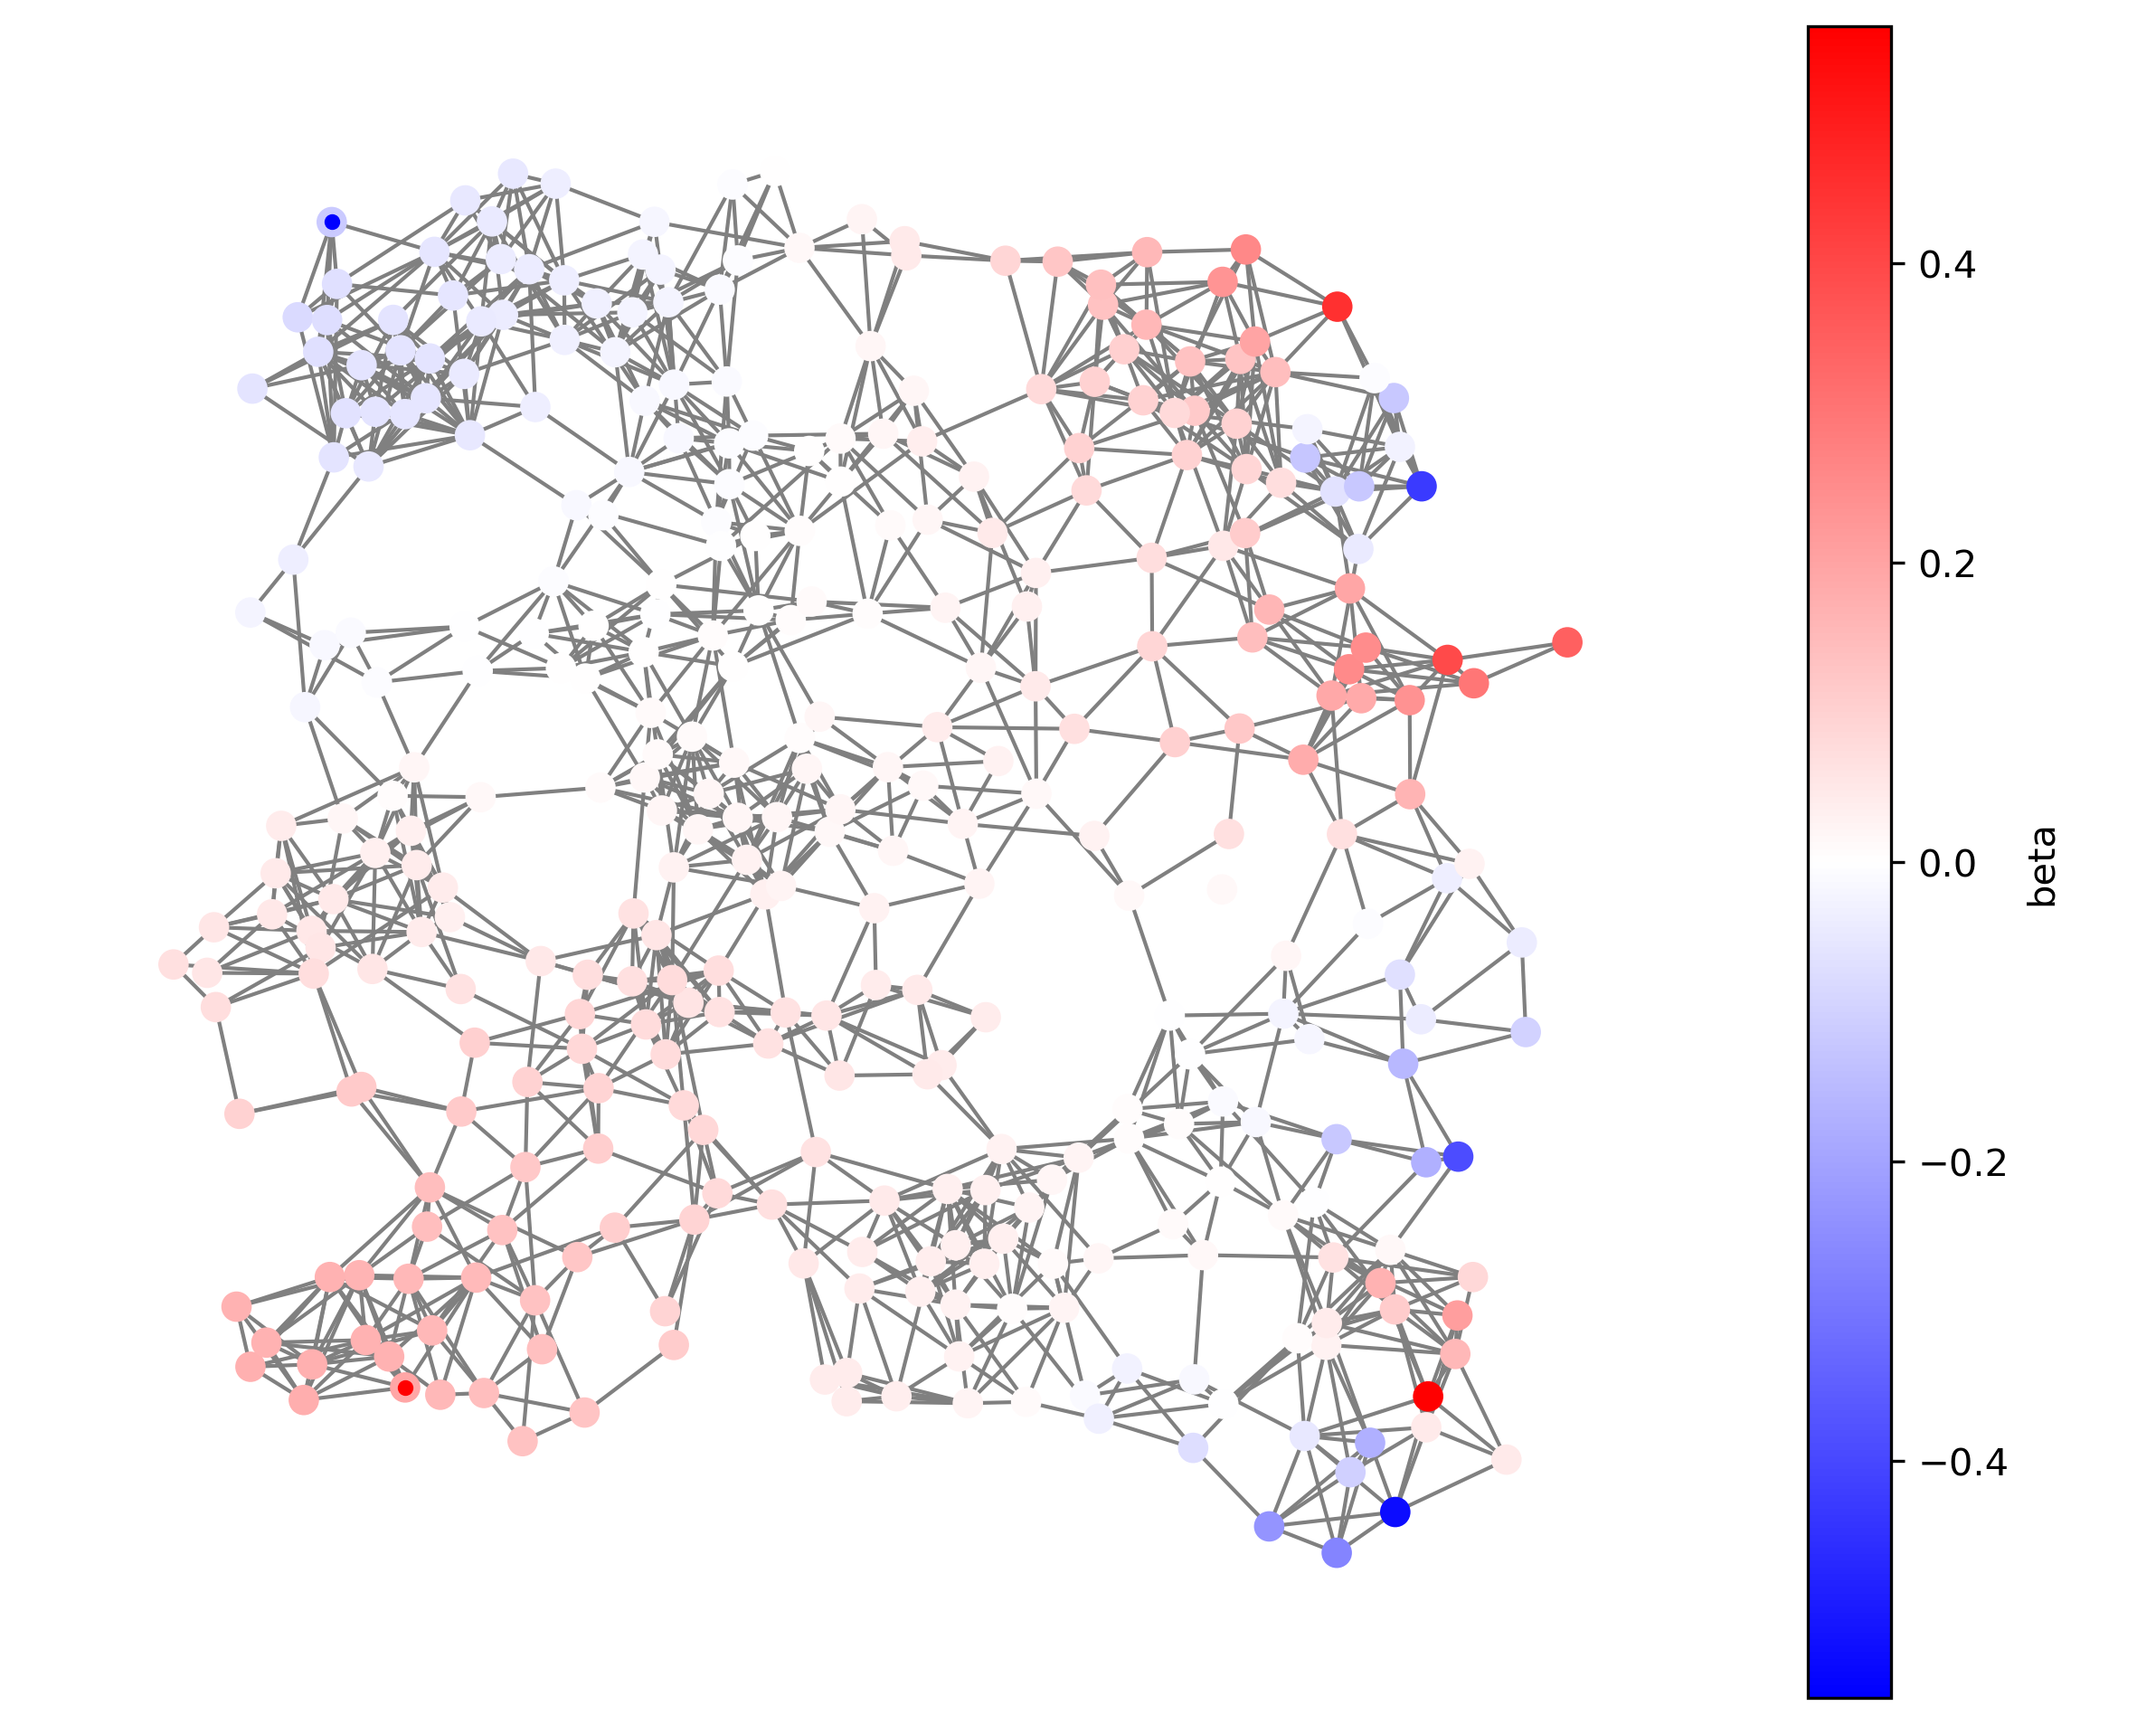

In [688]:
f,[ax,cax] = plt.subplots(1,2, gridspec_kw={"width_ratios":[50,1]},frameon=False, figsize=(10, 8), dpi=300)
canvas_width, canvas_height = f.canvas.get_width_height()
ax.axis('off')
cax.axis('off')


minWeights=np.min(glmBetaVoltageNode)
maxWeights=np.max(glmBetaVoltageNode)
cmap=plt.cm.bwr


node_weight=glmBetaVoltageNode

pos=nx.kamada_kawai_layout(g)
nodeList=g.nodes
numWires=g.number_of_nodes()

h=nx.draw_networkx_nodes(g,pos=pos,node_color=node_weight,cmap=cmap,node_size=50,ax=ax,vmin=-maxWeights,vmax=maxWeights)

h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color='grey')
# nx.draw_networkx_nodes(g,pos=pos,nodelist=sources,node_color='g',node_size=50,ax=ax)
nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[1]],node_color='r',node_size=10,ax=ax)
nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[0]],node_color='b',node_size=10,ax=ax)


# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=minWeights, vmax=maxWeights))
# sm.set_array([])

cbar = plt.colorbar(h, ax=ax,
                    fraction = 0.05, label='beta')

# animV = animation.FuncAnimation(f, image_draw_voltage, 
#                                frames=range(xlims[0],xlims[1],1)[::10], 
#                                interval=20, 
#                                repeat=False,fargs=(cmap,maxWeights,minWeights))
plt.show()


f.savefig(saveFig+'glmfitNodeVoltage_Class1blue_vs_Class2red_trial9_nw350_nj1350_nback2_manualsources.jpg')


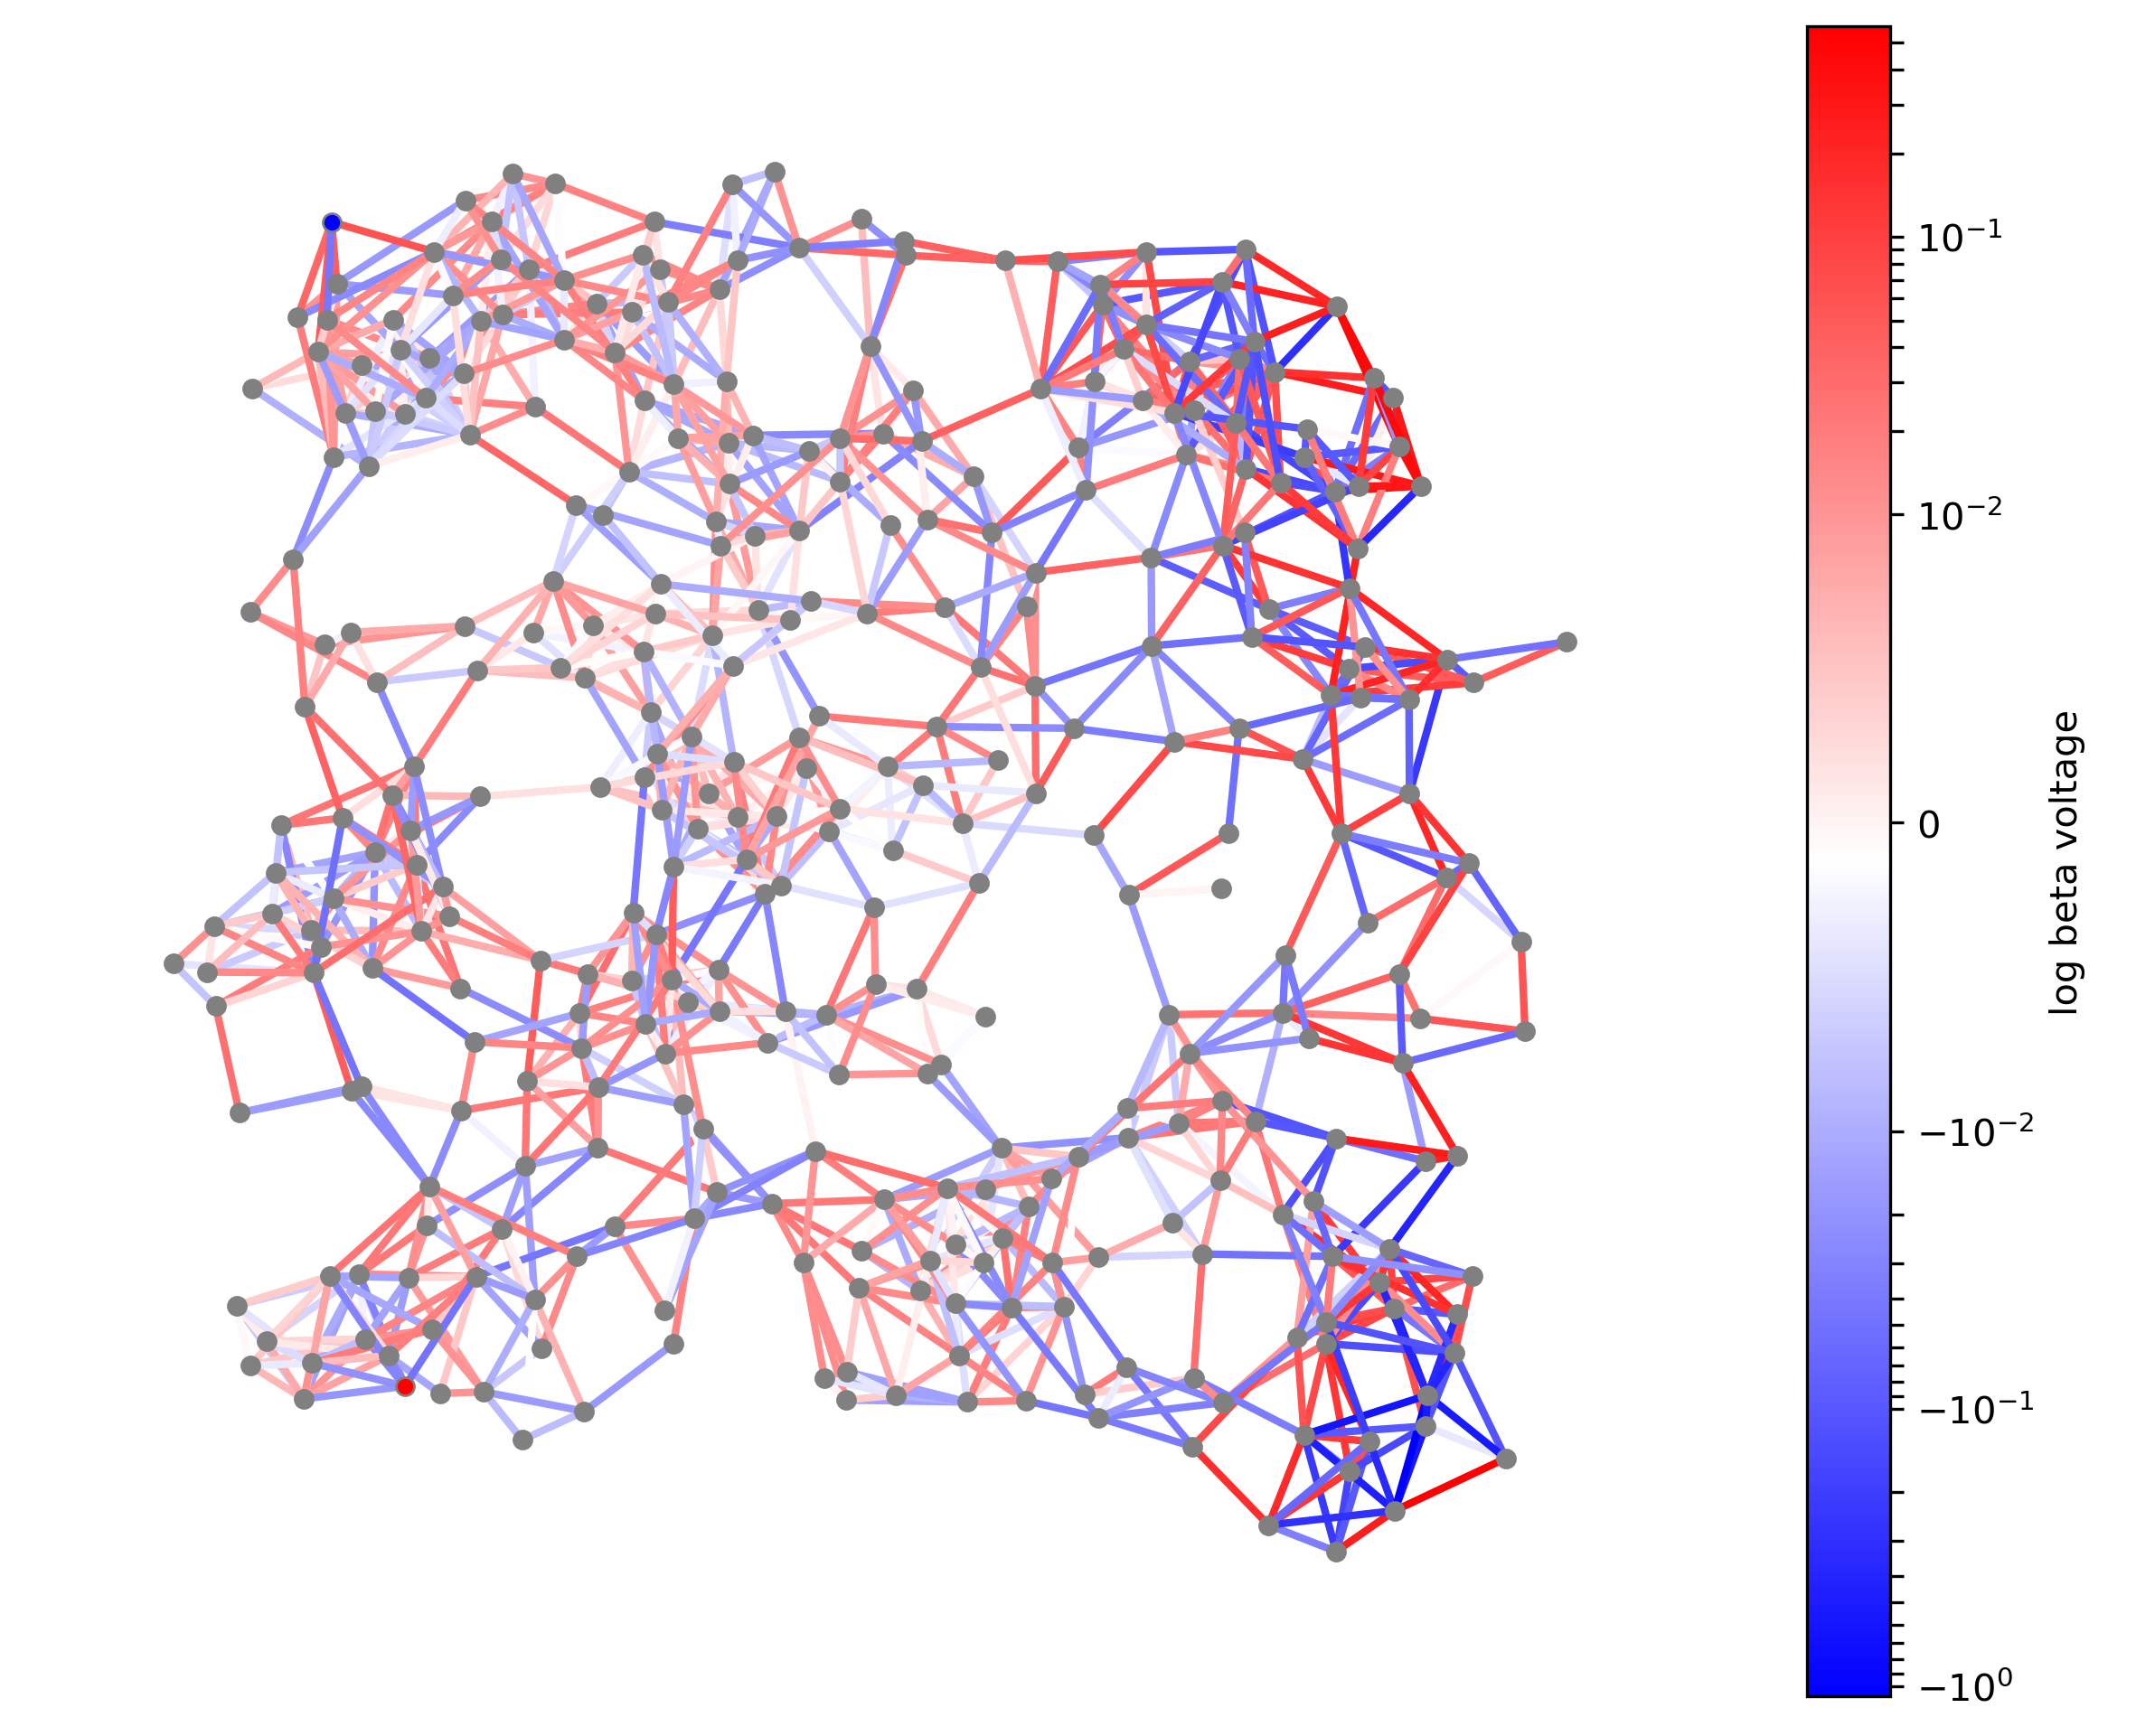

In [346]:
f,[ax,cax] = plt.subplots(1,2, gridspec_kw={"width_ratios":[50,1]},frameon=False, figsize=(10, 8), dpi=300)
canvas_width, canvas_height = f.canvas.get_width_height()
ax.axis('off')
cax.axis('off')
normalize=True

minWeights=np.min(glmBetaVoltageEdges)
maxWeights=np.max(glmBetaVoltageEdges)
cmap=plt.cm.bwr


edge_weight=glmBetaVoltageEdges

pos=nx.kamada_kawai_layout(g)
nodeList=g.nodes
numWires=g.number_of_nodes()

h=nx.draw_networkx_nodes(g,pos=pos,ax=ax,node_size=20,node_color='grey')#,node_color=node_weight,cmap=cmap,node_size=50,ax=ax,vmin=minWeights,vmax=maxWeights)

if normalize:
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=clrs.SymLogNorm(1e-2,base=10,vmin=minWeights, vmax=maxWeights))
    sm.set_array([])

    normweights=sm.norm(edge_weight).data
    normMin=sm.norm(minWeights)
    normMax=sm.norm(maxWeights)   
    h2=nx.draw_networkx_edges(g,pos=pos,ax=ax,width=2,edge_color=normweights,edge_cmap=cmap,edge_vmin=normMin,edge_vmax=normMax)
else:
    h2=nx.draw_networkx_edges(g,pos=pos,ax=ax,width=2,edge_color=edge_weight,edge_cmap=cmap,edge_vmin=-maxWeights,edge_vmax=maxWeights)
# nx.draw_networkx_nodes(g,pos=pos,nodelist=sources,node_color='g',node_size=50,ax=ax)
nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[1]],node_color='r',node_size=10,ax=ax)
nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[0]],node_color='b',node_size=10,ax=ax)

cbar = plt.colorbar(sm, ax=ax,
                    fraction = 0.05, label='log beta voltage')

# animV = animation.FuncAnimation(f, image_draw_voltage, 
#                                frames=range(xlims[0],xlims[1],1)[::10], 
#                                interval=20, 
#                                repeat=False,fargs=(cmap,maxWeights,minWeights))
plt.show()
f.savefig(saveFig+'glmfitEdgeVoltage_Class1blue_vs_Class2red_trial9_nw350_nj1350_nback2_manualsources.jpg')


In [689]:
#Coupling:
glmCoupling=loadmat(dataLoc+'beta_glmcoupling_glmfit_350nw_1350nj_trial9.mat') #this is from MATLAB GLMFIT.m

In [690]:
glmCouplingVoltage=glmCoupling['beta'][:,:,1]


In [691]:
f,[ax,cax] = plt.subplots(1,2, gridspec_kw={"width_ratios":[50,1]},frameon=False, figsize=(10, 8), dpi=300)
canvas_width, canvas_height = f.canvas.get_width_height()
ax.axis('off')
cax.axis('off')
normalize=False

minWeights=np.min(glmCouplingVoltage)
maxWeights=np.max(glmCouplingVoltage)
cmap=plt.cm.bwr


edge_weight=glmCouplingVoltage

pos=nx.kamada_kawai_layout(g)
nodeList=g.nodes
numWires=g.number_of_nodes()

h=nx.draw_networkx_nodes(g,pos=pos,ax=ax,node_size=20,node_color='grey')#,node_color=node_weight,cmap=cmap,node_size=50,ax=ax,vmin=minWeights,vmax=maxWeights)

if normalize:
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=clrs.SymLogNorm(1e-2,base=10,vmin=minWeights, vmax=maxWeights))
    sm.set_array([])

    normweights=sm.norm(edge_weight).data
    normMin=sm.norm(minWeights)
    normMax=sm.norm(maxWeights)   
    h2=nx.draw_networkx_edges(g,pos=pos,ax=ax,width=2,edge_color=normweights,edge_cmap=cmap,edge_vmin=normMin,edge_vmax=normMax)
else:
    h2=nx.draw_networkx_edges(g,pos=pos,ax=ax,width=2,edge_color=edge_weight,edge_cmap=cmap,edge_vmin=-maxWeights,edge_vmax=maxWeights)
# nx.draw_networkx_nodes(g,pos=pos,nodelist=sources,node_color='g',node_size=50,ax=ax)
nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[1]],node_color='r',node_size=10,ax=ax)
nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[0]],node_color='b',node_size=10,ax=ax)

cbar = plt.colorbar(sm, ax=ax,
                    fraction = 0.05, label='log beta voltage')

# animV = animation.FuncAnimation(f, image_draw_voltage, 
#                                frames=range(xlims[0],xlims[1],1)[::10], 
#                                interval=20, 
#                                repeat=False,fargs=(cmap,maxWeights,minWeights))
plt.show()
# f.savefig(saveFig+'glmfitEdgeVoltage_Class1blue_vs_Class2red_trial9_nw350_nj1350_nback2_manualsources.jpg')


ValueError: RGBA sequence should have length 3 or 4

In [697]:
z=np.zeros((len(edge_weight),len(edge_weight)))
for i in range(len(edge_weight)):
    for j in range(len(edge_weight)):
        if edge_weight[i,j] > 0.7*np.max(edge_weight) or edge_weight[i,j] < 0.7*np.min(edge_weight):
            z[i,j]=edge_weight[i,j]
        elif a[i,j]==0:
            z[i,j]=0

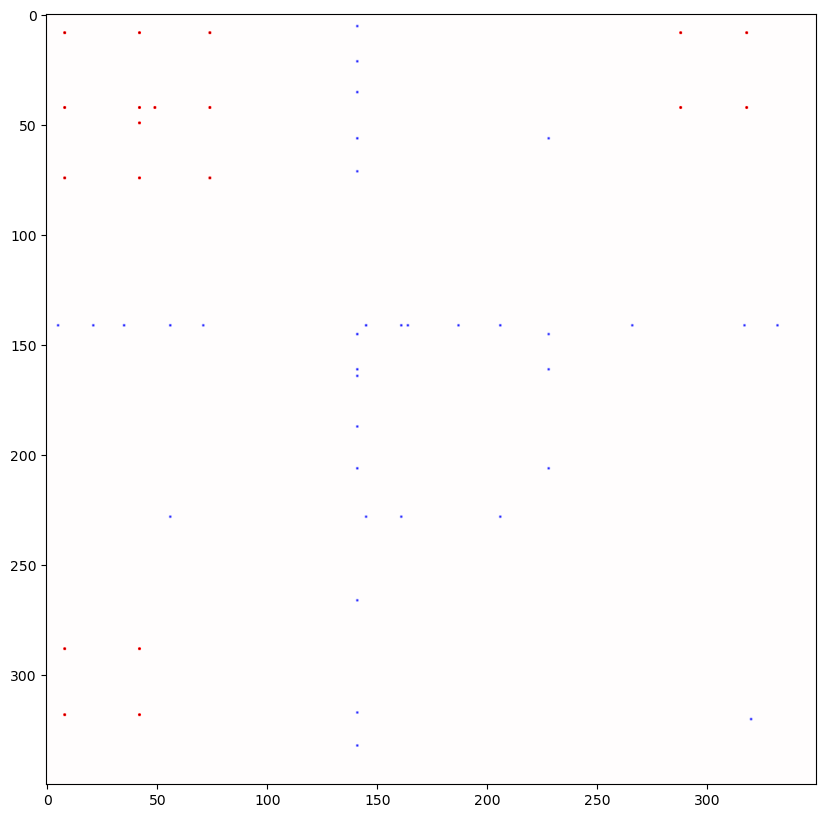

In [541]:
f=plt.figure(figsize=(10,10))
plt.imshow(z,cmap=plt.cm.seismic,vmin=-np.max(edge_weight),vmax=np.max(edge_weight))
plt.rcParams['pdf.fonttype'] = 42

# X,Y = np.meshgrid(np.arange(z.shape[1]),np.arange(z.shape[0]))
# plt.scatter(X,Y,c=z, s=20, marker="o",cmap=plt.cm.seismic,vmin=-np.max(edge_weight),vmax=np.max(edge_weight))
# ax3=plt.gca()
# ax3.set_aspect("equal")
# ax3.margins(0)

plt.show()


In [538]:
f.savefig(saveFig+'glmcoupling_glmfit_350nw_1350nj_trial9_top20percent.pdf',format='pdf',dpi=300)

In [698]:
topnodes=np.where(z)

In [699]:
topnodes

(array([  0,   0,   0, ..., 348, 348, 349]),
 array([141, 228, 320, ..., 228, 320, 141]))

In [700]:
topnodesvals=z[topnodes[0],topnodes[1]]

In [701]:
topnodesvals

array([-0.1631673 , -0.14311522, -0.15251893, ..., -0.14079946,
       -0.15374664, -0.14137835])

In [702]:
newEdgeList=np.array(topnodes).T

In [703]:
newEdgeList

array([[  0, 141],
       [  0, 228],
       [  0, 320],
       ...,
       [348, 228],
       [348, 320],
       [349, 141]])

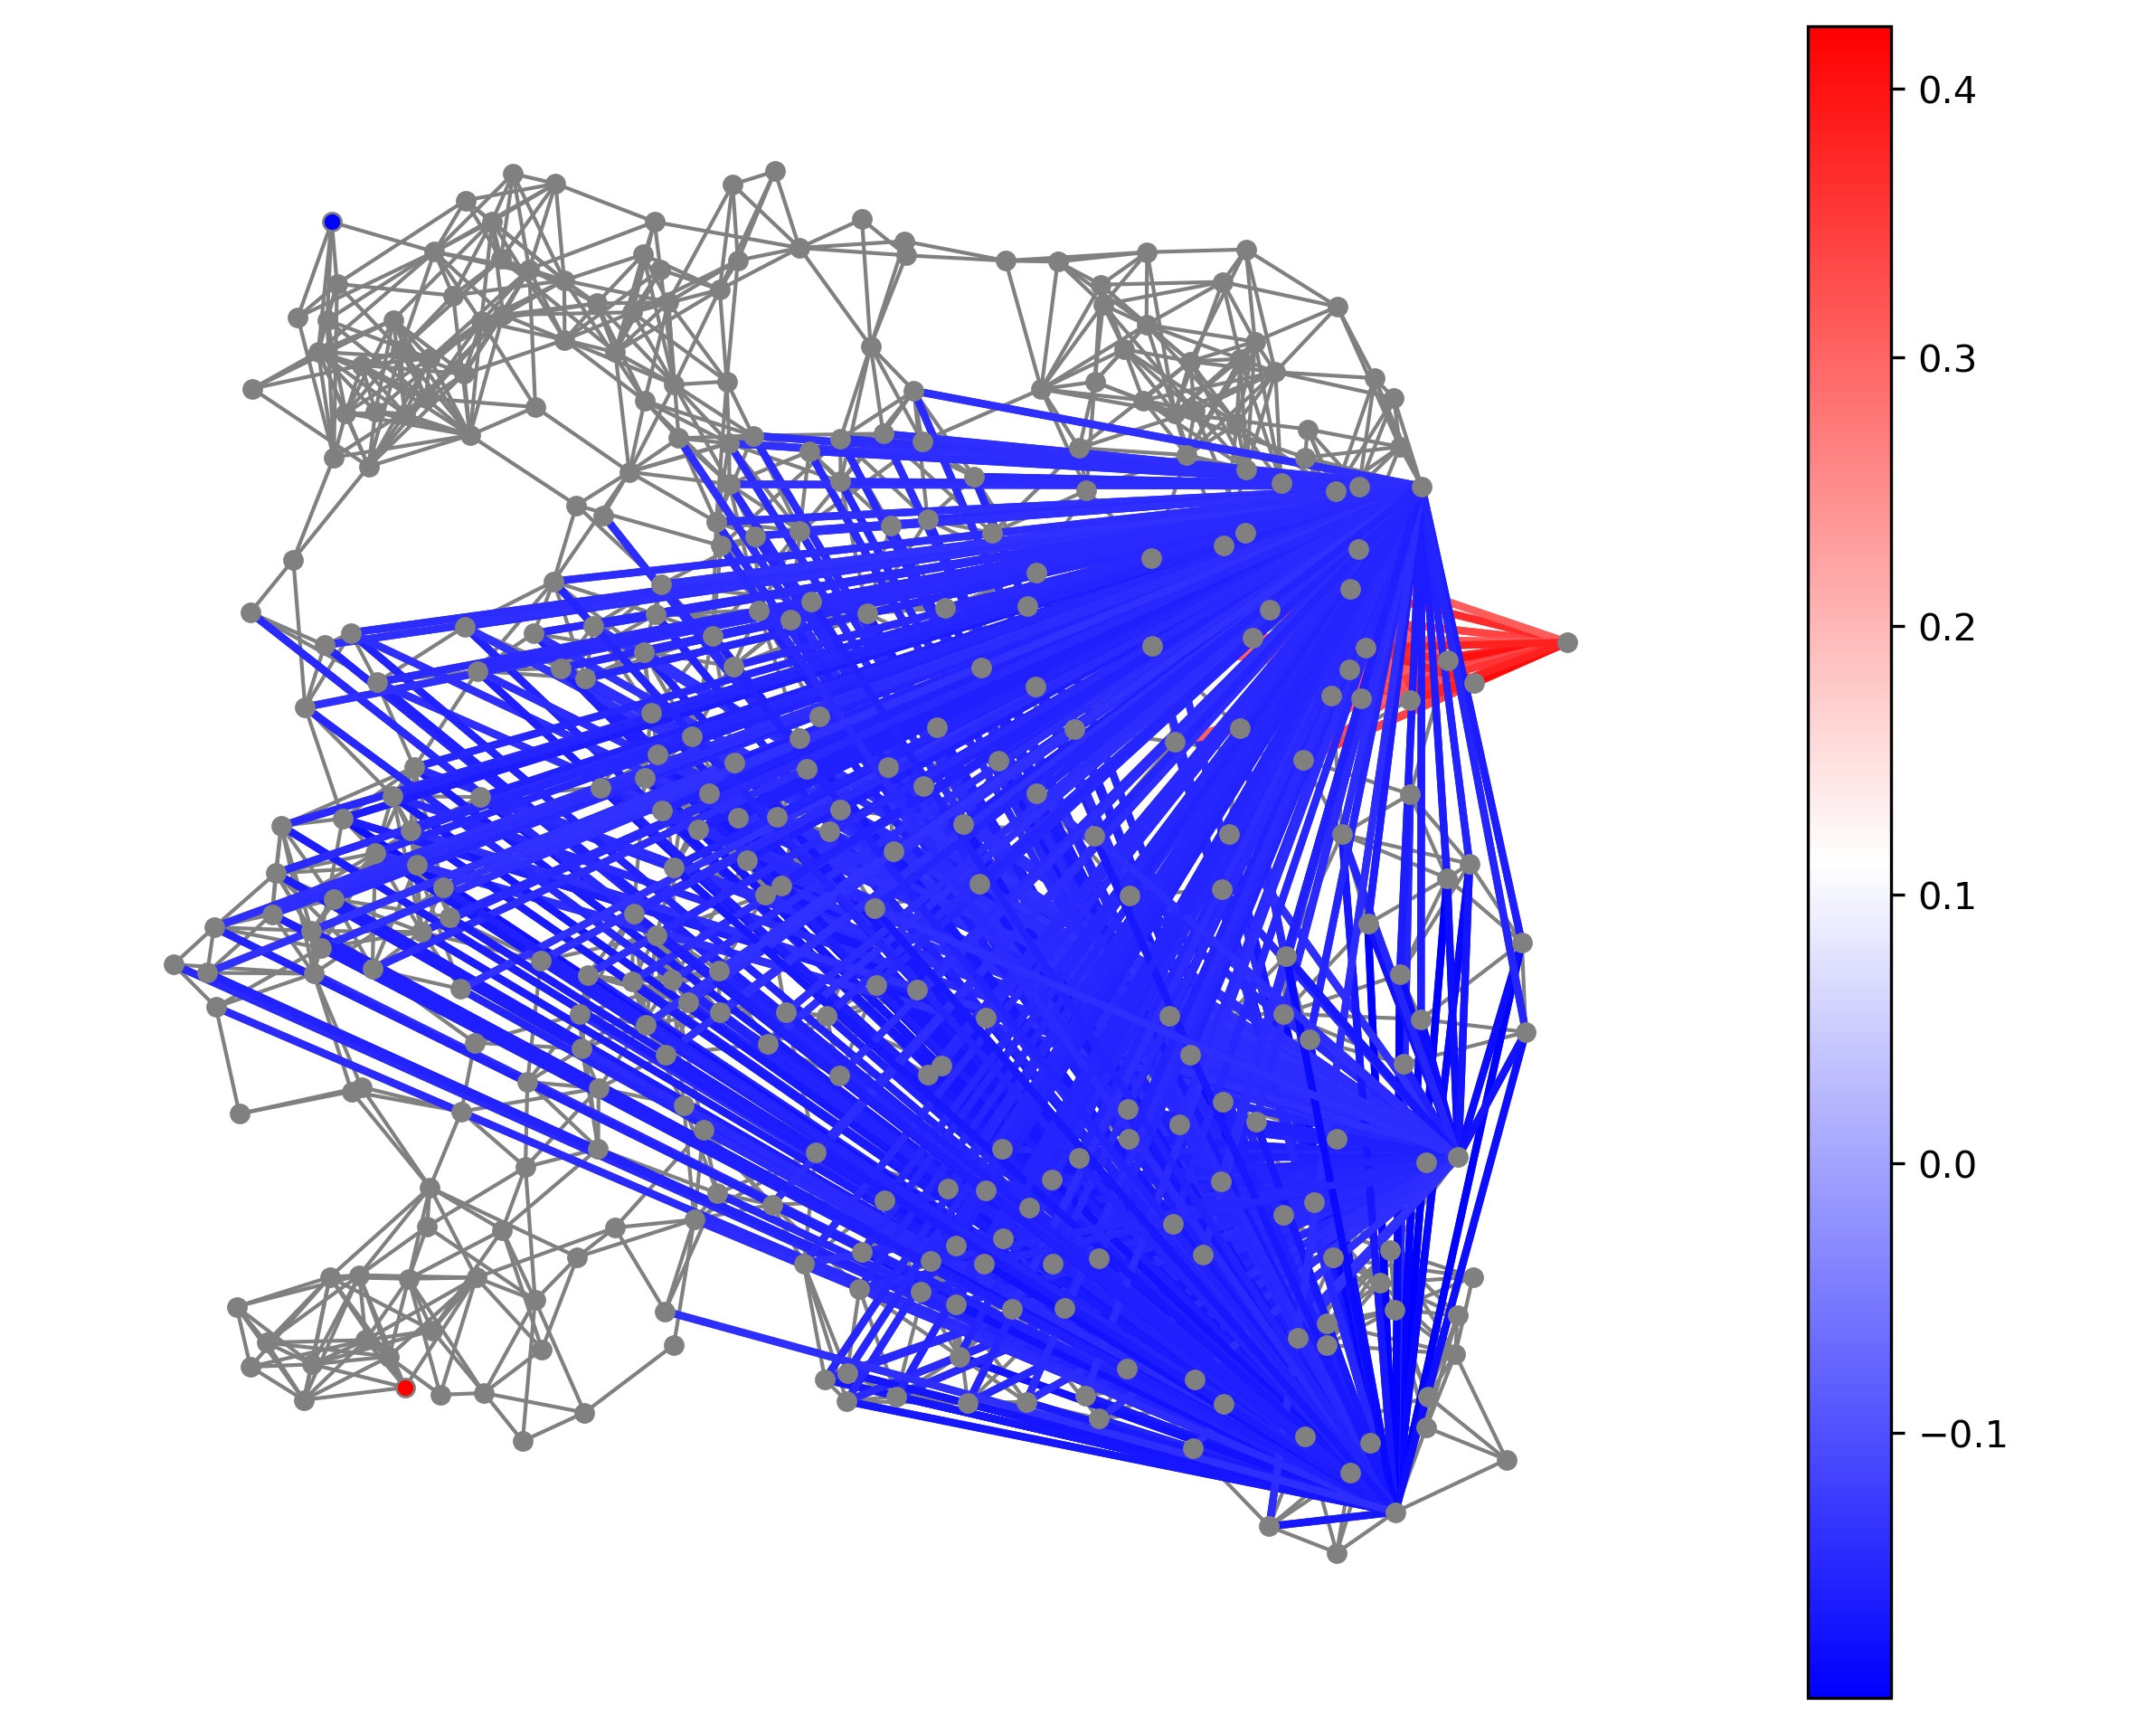

In [705]:
f,[ax,cax] = plt.subplots(1,2, gridspec_kw={"width_ratios":[50,1]},frameon=False, figsize=(10, 8), dpi=300)
canvas_width, canvas_height = f.canvas.get_width_height()
ax.axis('off')
cax.axis('off')

minWeights=np.min(topnodesvals)
maxWeights=np.max(topnodesvals)
cmap=plt.cm.bwr


pos=nx.kamada_kawai_layout(g)
nodeList=g.nodes
numWires=g.number_of_nodes()

h=nx.draw_networkx_nodes(g,pos=pos,ax=ax,node_size=20,node_color='grey')#,node_color=node_weight,cmap=cmap,node_size=50,ax=ax,vmin=minWeights,vmax=maxWeights)
h2=nx.draw_networkx_edges(g,pos=pos,ax=ax,width=1,edge_color='grey')

h2=nx.draw_networkx_edges(g,pos=pos,ax=ax,width=2,edge_color=topnodesvals,edgelist=tuple(newEdgeList),edge_cmap=cmap,edge_vmin=minWeights,edge_vmax=maxWeights)
# nx.draw_networkx_nodes(g,pos=pos,nodelist=sources,node_color='g',node_size=50,ax=ax)
nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[1]],node_color='r',node_size=10,ax=ax)
nx.draw_networkx_nodes(g,pos=pos,nodelist=[drains[0]],node_color='b',node_size=10,ax=ax)

cbar = plt.colorbar(h2, ax=ax,
                    fraction = 0.05, label='')

# animV = animation.FuncAnimation(f, image_draw_voltage, 
#                                frames=range(xlims[0],xlims[1],1)[::10], 
#                                interval=20, 
#                                repeat=False,fargs=(cmap,maxWeights,minWeights))
plt.show()
# f.savefig(saveFig+'glmfitEdgeVoltage_Class1blue_vs_Class2red_trial9_nw350_nj1350_nback2_manualsources.jpg')
